<a href="https://colab.research.google.com/github/safoorasaher/BHARATINTERN_TASK01/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<ipython-input-6-1228883c5914>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette="inferno")


<Axes: xlabel='label', ylabel='count'>

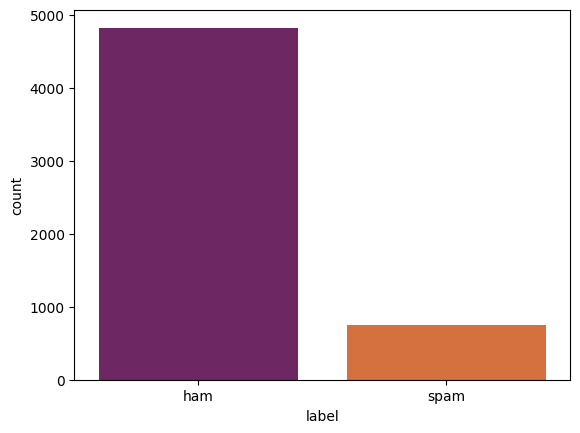

In [6]:
sns.countplot(data=df, x='label', palette="inferno")

In [7]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [8]:
!pip install nltk
import nltk
nltk.download('stopwords')
# Testing
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [9]:
# Test with our dataset
df['message'][:20].apply(process)

0     [go, jurong, point, crazi, avail, bugi, n, gre...
1                          [ok, lar, joke, wif, u, oni]
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         [u, dun, say, earli, hor, u, c, alreadi, say]
4     [nah, dont, think, goe, usf, live, around, tho...
5     [freemsg, hey, darl, 3, week, word, back, id, ...
6     [even, brother, like, speak, treat, like, aid,...
7     [per, request, mell, mell, oru, minnaminungint...
8     [winner, valu, network, custom, select, receiv...
9     [mobil, 11, month, u, r, entitl, updat, latest...
10    [im, gonna, home, soon, dont, want, talk, stuf...
11    [six, chanc, win, cash, 100, 20000, pound, txt...
12    [urgent, 1, week, free, membership, å£100000, ...
13    [ive, search, right, word, thank, breather, pr...
14                                       [date, sunday]
15    [xxxmobilemovieclub, use, credit, click, wap, ...
16                                     [oh, kim, watch]
17    [eh, u, rememb, 2, spell, name, ye, v, nau

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])

In [12]:
mess = df.iloc[2]['message']
print(mess)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [13]:
print(tfidfv.transform([mess]))

  (0, 7741)	0.18906287739887084
  (0, 7708)	0.14471405235314777
  (0, 7276)	0.12336193745345178
  (0, 7099)	0.2190885570936267
  (0, 6959)	0.11759458460817876
  (0, 5856)	0.16027970945850903
  (0, 5815)	0.2330497030932461
  (0, 5768)	0.2330497030932461
  (0, 4592)	0.15903719770411495
  (0, 3091)	0.11505037200973967
  (0, 2969)	0.16669800498830506
  (0, 2868)	0.4660994061864922
  (0, 2748)	0.3571909758763146
  (0, 2246)	0.20302402339849024
  (0, 2076)	0.19516151371199045
  (0, 1180)	0.16669800498830506
  (0, 833)	0.2190885570936267
  (0, 433)	0.22518719340674634
  (0, 420)	0.22518719340674634
  (0, 413)	0.09987750376879972
  (0, 72)	0.2330497030932461


In [14]:
j = tfidfv.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if j[i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names_out()[i],sep='\t')

index	idf	tfidf	term
72	8.5271	0.2330	08452810075over18
413	3.6544	0.0999	2
420	8.2394	0.2252	2005
433	8.2394	0.2252	21st
833	8.0163	0.2191	87121
1180	6.0993	0.1667	appli
2076	7.1408	0.1952	comp
2246	7.4285	0.2030	cup
2748	6.5346	0.3572	entri
2868	8.5271	0.4661	fa
2969	6.0993	0.1667	final
3091	4.2096	0.1151	free
4592	5.8190	0.1590	may
5768	8.5271	0.2330	questionstd
5815	8.5271	0.2330	ratetc
5856	5.8645	0.1603	receiv
6959	4.3027	0.1176	text
7099	8.0163	0.2191	tkt
7276	4.5137	0.1234	txt
7708	5.2950	0.1447	win
7741	6.9176	0.1891	wkli


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state = 42)

In [17]:
spam_filter.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x78ae378cb760>)),
                ('classifier', MultinomialNB())])

In [18]:
predictions = spam_filter.predict(x_test)

In [19]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 1672
Number of wrong of predictions 68


In [20]:
x_test[y_test != predictions]

1044    We know someone who you know that fancies you....
683     Hi I'm sue. I am 20 years old and work as a la...
4733    Buy Space Invaders 4 a chance 2 win orig Arcad...
15      XXXMobileMovieClub: To use your credit, click ...
4071    Loans for any purpose even if you have Bad Cre...
                              ...                        
4270    Natalja (25/F) is inviting you to be her frien...
5269    If you don't, your prize will go to another cu...
2574    Your next amazing xxx PICSFREE1 video will be ...
2412    I don't know u and u don't know me. Send CHAT ...
1662    Hi if ur lookin 4 saucy daytime fun wiv busty ...
Name: message, Length: 68, dtype: object

In [21]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1521
        spam       0.69      1.00      0.82       151

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [22]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Win 500 pounds by scanning the QR code sent to you.')

'spam'

In [23]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('Its a part of checking IQ')

'ham'